In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgbm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('C:\\Users\\...dataset_bmi.csv')

In [5]:
#check the proportion of our target variable in the combined dataset:
count_no_con = len(df[df['GESTATIONAL_AGE_CAT']==0])
count_yes = len(df[df['GESTATIONAL_AGE_CAT']==1])
pct_of_no_con = count_no_con/(count_no_con+count_yes)
print("percentage of term labor", pct_of_no_con*100)
pct_of_yes = count_yes/(count_no_con+count_yes)
print("percentage of preterm labor", pct_of_yes*100)

percentage of term labor 83.52908277404921
percentage of preterm labor 16.47091722595078


In [6]:
#Prepare train and test sets
y = df.GESTATIONAL_AGE_CAT
X = df.drop(['GESTATIONAL_AGE_CAT','Unnamed: 0'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [7]:
# prepare models
seed = 7
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGBoost', xgb.XGBClassifier(scale_pos_weight= 5)))
models.append(('LightGBM', lgbm.LGBMClassifier(scale_pos_weight= 5)))

In [8]:
# evaluate each model in turn
results = []
names = []
scoring='recall'

In [9]:
for name, model in models:

    kfold = model_selection.KFold(n_splits=5)

    cvresults = model_selection.cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring=scoring)

    results.append(cvresults)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cvresults.mean(), cvresults.std())

    print(msg)

LR: 0.000000 (0.000000)
LDA: 0.007564 (0.010033)
KNN: 0.017715 (0.007184)
CART: 0.040730 (0.023839)
NB: 0.173383 (0.051545)
SVM: 0.000000 (0.000000)
RF: 0.041661 (0.017531)
XGBoost: 0.380846 (0.079188)
LightGBM: 0.333074 (0.068241)


C:\Users\kimam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


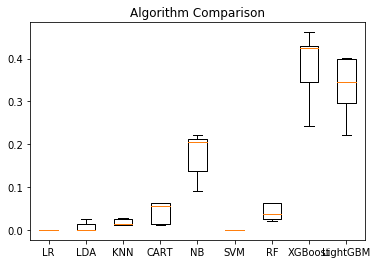

In [14]:
# boxplot algorithm comparison
fig = plt.figure()  # create a figure object
plt.title('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('mc_bp.png')
plt.show()

It looks like gradient boosting classifiers worked the best (highest recall value).